# Worldwide Out of School Rates for Primary School Aged Children
## An Analysis of SDG 4: Quality Education 


This project analyzes UNICEF data on primary school out-of-school rates for countries worldwide. The dataset contains information on educational access disparities across regions, gender, urban/rural divides, and wealth quintiles.

dataset: https://data.unicef.org/wp-content/uploads/2019/09/Out_of_school_rate_2022_formatted.xlsx

### Notes on the data:

**Out-of-school children rate (SDG4.1.4)**: Percentage of children or young people in the official age range for a given level of education who are not attending either pre-primary, primary, secondary, or higher levels of education. 
    
    
#### Methodology	
*Unit of measure*:  Percentage

*Time frame for survey*:    Household survey data from the past 10 years are used for the calculation of adjusted net attendance rate. For countries with multiple years of data, the most recent dataset is used.    
    
#### Glossary - the database contains the following:	
*ISO Three*:  digit alphabetical codes International Standard ISO 3166-1 assigned by the International Organization for Standardization (ISO). The latest version is available online at http://www.iso.org/iso/home/standards/country_codes.htm. (column A)
*Countries and areas*:  The UNICEF Global databases contain a set of 202 countries and Kosovo under UNSC res. 1244* as reported on through the State of the World's Children Statistical Annex 2017 (column B)
    
*Data Source*:  Short name for data source, followed by the year(s) in which the data collection (e.g., survey interviews) took place (column P)
*Time period*:	Represents the year(s) in which the data collection (e.g. survey interviews) took place. (column Q)

    
|**Region, Sub-region**	| UNICEF regions (column C) and UNICEF Sub-regions (column D)|
|-----------------------|------------------------------------------------------------|
|**EAP**	|East Asia and the Pacific|
|**ECA**	|Europe and Central Asia|
|**EECA**	|Eastern Europe and Central Asia|
|**ESA**	|Eastern and Southern Africa|
|**LAC**	|Latin America and the Caribbean|
|**MENA**	|Middle East and North Africa|
|**NA**	|North America|
|**SA**	|South Asia|
|**SSA** 	|Sub-Saharan Africa|
|**WCA**	|West and Central Africa|


Development regions	Economies are currently divided into four income groupings: low, lower-middle, upper-middle, and high. Income is measured using gross national income (GNI) per capita, in U.S. dollars, converted from local currency using the World Bank Atlas method (column E).
    
    
### Disclaimer	
All reasonable precautions have been taken to verify the information in this database. In no event shall UNICEF be liable for damages arising from its use or interpretation	
* All references to Kosovo in this dataset should be understood to be in the context of United Nations Security Council resolution 1244 (1999). 	





### Project Overview:
This analysis examines the global landscape of primary school out-of-school rates using UNICEF data. It explores disparities across regions, gender, geographic location, and wealth levels to identify where educational exclusion is most severe and which factors are most strongly associated with children being out of school.

### Project Objectives:
1. Clean and preprocess the UNICEF out-of-school rates dataset
2. Explore regional and demographic patterns in education access
3. Identify factors that correlate with higher out-of-school rates
4. Create UNICEF-aligned visualizations to communicate key findings
5. Provide actionable recommendations for UNICEF programming and policy advocacy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap



# Setting display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)

# Setting visualization styles with UNICEF colors
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)

# Define UNICEF color palette
unicef_colors = ['#005DAA', '#6BC6FF', '#00833D', '#80BD41', 
                 '#F26A21', '#FF9E00', '#7A0046', '#D72C66']


## Data Loading and Initial Exploration


In [2]:
df = pd.read_csv('Primary-Table 1.csv', 
                 keep_default_na=False, 
                 na_values=['', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', 
                            '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NULL', 
                            'NaN', 'n/a', 'nan', 'null'])
print(f"Dataset shape: {df.shape}")
df.head()


Dataset shape: (238, 25)


,ISO3,Country,Region,Sub-region,Development Regions,Total,Gender,Unnamed: 7,Residence,Unnamed: 9,Wealth quintile,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Source,Unnamed: 16,Population data,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,NaN,NaN,NaN,NaN,NaN,Female,Male,Rural,Urban,Poorest,Second,Middle,Fourth,Richest,Data source,Time period,"Pop, total","Pop, female","Pop, male","Pop, rural","Pop, urban",Urban percentage,NaN,NaN
1,AFG,Afghanistan,SA,SA,Least Developed,37,47,28,42,19,42,47,46,32,16,DHS 2015,2015,6422789,3136310,3286479,4785306,1637483.12985586,25%,NaN,NaN
2,ALB,Albania,ECA,EECA,More Developed,2,2,3,4,1,4,3,2,2,1,DHS 2017-18,2018,165268,78319,86949,65580,99687.8124144831,60%,NaN,NaN
3,DZA,Algeria,MENA,MENA,Less Developed,2,2,2,2,1,4,1,2,1,1,MICS 2019,2020,4497034,2201637,2295397,1230885,3266149.37441625,73%,NaN,NaN
4,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3913,1879,2034,467,3445.84821904279,88%,NaN,NaN


### Understanding the Dataset

This dataset contains information about primary school out-of-school rates across different countries. Each row represents a country, and columns include:
- ISO3 code and country name
- Regional classifications
- Out-of-school percentages broken down by total, gender, urban/rural, and wealth quintiles
- Data sources and time periods
- Population data for different demographic groups
```

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ISO3                 203 non-null    object 
 1   Country              231 non-null    object 
 2   Region               217 non-null    object 
 3   Sub-region           210 non-null    object 
 4   Development Regions  204 non-null    object 
 5   Total                145 non-null    object 
 6   Gender               146 non-null    object 
 7   Unnamed: 7           146 non-null    object 
 8   Residence            128 non-null    object 
 9   Unnamed: 9           128 non-null    object 
 10  Wealth quintile      122 non-null    object 
 11  Unnamed: 11          122 non-null    object 
 12  Unnamed: 12          122 non-null    object 
 13  Unnamed: 13          122 non-null    object 
 14  Unnamed: 14          122 non-null    object 
 15  Source               119 non-null    obj

## Data Cleaning and Preprocessing

In [4]:
# Checking for missing values
print("Missing values by column:")
missing_values = df.isnull().sum()
missing_values_percent = (missing_values / df.shape[0]) * 100
missing_values_df = pd.DataFrame({'Missing Values': missing_values, 
                                  'Percentage': missing_values_percent})
missing_values_df.sort_values('Missing Values', ascending=False).head(20)



Missing values by column:


,Missing Values,Percentage
Unnamed: 24,238,100.000000
Unnamed: 23,238,100.000000
Unnamed: 16,119,50.000000
Source,119,50.000000
Wealth quintile,116,48.739496
Unnamed: 14,116,48.739496
Unnamed: 13,116,48.739496
Unnamed: 11,116,48.739496
Unnamed: 12,116,48.739496
Unnamed: 9,110,46.218487


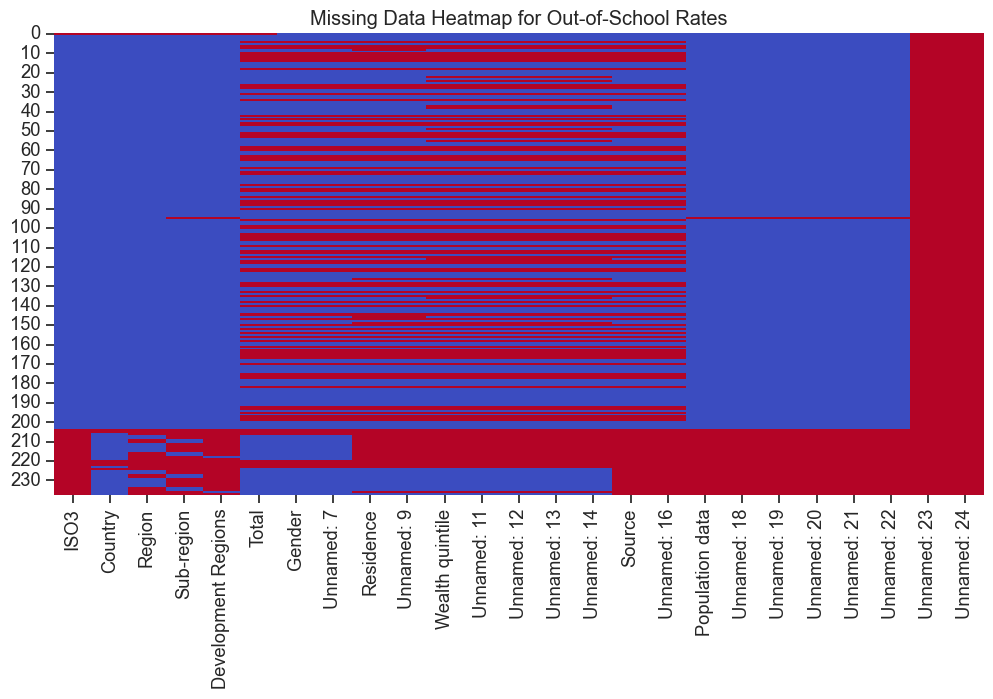

In [5]:
# Visualizing missing data with a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False)
plt.title("Missing Data Heatmap for Out-of-School Rates")
plt.show()

### Cleaning Column Names
First, let's clean the column names to make them more consistent and easier to work with

In [6]:
# Remove whitespace and standardize column names
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Alternative column renaming approach based on the provided notebook
# This approach explicitly maps specific columns to new names
new_columns = {
    'gender': 'female_perc', 
    'unnamed:_7': 'male_perc', 
    'residence': 'rural', 
    'unnamed:_9': 'urban',
    'wealth_quintile': 'poorest_quintile', 
    'unnamed:_11': 'second_quintile', 
    'unnamed:_12': 'middle_quintile',
    'unnamed:_13': 'fourth_quintile', 
    'unnamed:_14': 'richest_quintile',
    'unnamed:_16': 'time_period',
    'population_data': 'pop_total',
    'unnamed:_18': 'pop_female',
    'unnamed:_19': 'pop_male',
    'unnamed:_20': 'pop_rural',
    'unnamed:_21': 'pop_urban',
    'unnamed:_22': 'urban_percentage'
    }

df.rename(columns=new_columns, inplace=True)

# Print the cleaned column names
print("Cleaned column names:")
for col in df.columns:
    print(f"- {col}")

Cleaned column names:
- iso3
- country
- region
- sub-region
- development_regions
- total
- female_perc
- male_perc
- rural
- urban
- poorest_quintile
- second_quintile
- middle_quintile
- fourth_quintile
- richest_quintile
- source
- time_period
- pop_total
- pop_female
- pop_male
- pop_rural
- pop_urban
- urban_percentage
- unnamed:_23
- unnamed:_24


In [7]:
#Drop columns with no data
df.drop(columns=['unnamed:_23','unnamed:_24'], inplace=True)

### Handling Missing Values and Data Type Conversion

In [8]:
# Keep rows 1-203 to exclude aggregates at the bottom of the dataset
df_countries = df.iloc[1:203].copy()
print(df_countries)

    iso3                             country region sub-region development_regions total female_perc male_perc rural urban poorest_quintile second_quintile middle_quintile fourth_quintile richest_quintile       source time_period pop_total pop_female pop_male pop_rural         pop_urban urban_percentage
1    AFG                         Afghanistan     SA         SA     Least Developed    37          47        28    42    19               42              47              46              32               16     DHS 2015        2015   6422789    3136310  3286479   4785306  1637483.12985586              25%
2    ALB                             Albania    ECA       EECA      More Developed     2           2         3     4     1                4               3               2               2                1  DHS 2017-18        2018    165268      78319    86949     65580  99687.8124144831              60%
3    DZA                             Algeria   MENA       MENA      Less Developed   

In [9]:
print(f"Number of countries in cleaned dataset: {df_countries.shape[0]}")

#Convert columns to numeric type
numeric_columns = ['total', 'female_perc', 'male_perc', 'rural', 'urban', 'poorest_quintile', 'second_quintile', 
                   'middle_quintile', 'fourth_quintile', 'richest_quintile', 'time_period', 'pop_total',
                   'pop_female', 'pop_male', 'pop_rural', 'pop_urban']
for col in numeric_columns:
    df_countries[col] = pd.to_numeric(df_countries[col], errors='coerce')

#Clean urban_percentage column
df_countries['urban_percentage'] = df_countries['urban_percentage'].str.replace('%','')
pd.to_numeric(df_countries['urban_percentage'], errors='coerce')

# For Argentina, set rural/urban values to 0 if they're missing since out of school rates for Argentina are 0
df_countries.loc[df_countries['country'] == 'Argentina', ['rural', 'urban']] = 0
    
# For Qatar, use MENA region means for rural/urban values
mena_rural_mean = df_countries.loc[df_countries['region'] == 'MENA', 'rural'].mean(numeric_only=True)
mena_urban_mean = df_countries.loc[df_countries['region'] == 'MENA', 'urban'].mean(numeric_only=True)
df_countries.loc[df_countries['country'] == 'Qatar', 'rural'] = mena_rural_mean
df_countries.loc[df_countries['country'] == 'Qatar', 'urban'] = mena_urban_mean

# Fill missing values for categorical variables with 'Unknown'
categorical_cols = ['source', 'time_period']
for col in categorical_cols:
    df_countries[col] = df_countries[col].fillna('Unknown')

# Creating a column to indicate data recency (years since data collection)
current_year = 2025

df_countries['time_period'] = pd.to_numeric(df_countries['time_period'], errors='coerce')
df_countries['data_age'] = current_year - df_countries['time_period']

# View the cleaned dataset
df_countries.head()

Number of countries in cleaned dataset: 202


,iso3,country,region,sub-region,development_regions,total,female_perc,male_perc,rural,urban,poorest_quintile,second_quintile,middle_quintile,fourth_quintile,richest_quintile,source,time_period,pop_total,pop_female,pop_male,pop_rural,pop_urban,urban_percentage,data_age
1,AFG,Afghanistan,SA,SA,Least Developed,37.0,47.0,28.0,42.0,19.0,42.0,47.0,46.0,32.0,16.0,DHS 2015,2015.0,6422789.0,3136310.0,3286479.0,4785306.0,1.637483e+06,25,10.0
2,ALB,Albania,ECA,EECA,More Developed,2.0,2.0,3.0,4.0,1.0,4.0,3.0,2.0,2.0,1.0,DHS 2017-18,2018.0,165268.0,78319.0,86949.0,65580.0,9.968781e+04,60,7.0
3,DZA,Algeria,MENA,MENA,Less Developed,2.0,2.0,2.0,2.0,1.0,4.0,1.0,2.0,1.0,1.0,MICS 2019,2020.0,4497034.0,2201637.0,2295397.0,1230885.0,3.266149e+06,73,5.0
4,AND,Andorra,ECA,WE,More Developed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,3913.0,1879.0,2034.0,467.0,3.445848e+03,88,NaN
5,AGO,Angola,SSA,ESA,Least Developed,22.0,22.0,21.0,35.0,14.0,39.0,33.0,19.0,12.0,5.0,DHS 2015-16,2016.0,6029594.0,2998637.0,3030957.0,2079341.0,3.950253e+06,66,9.0


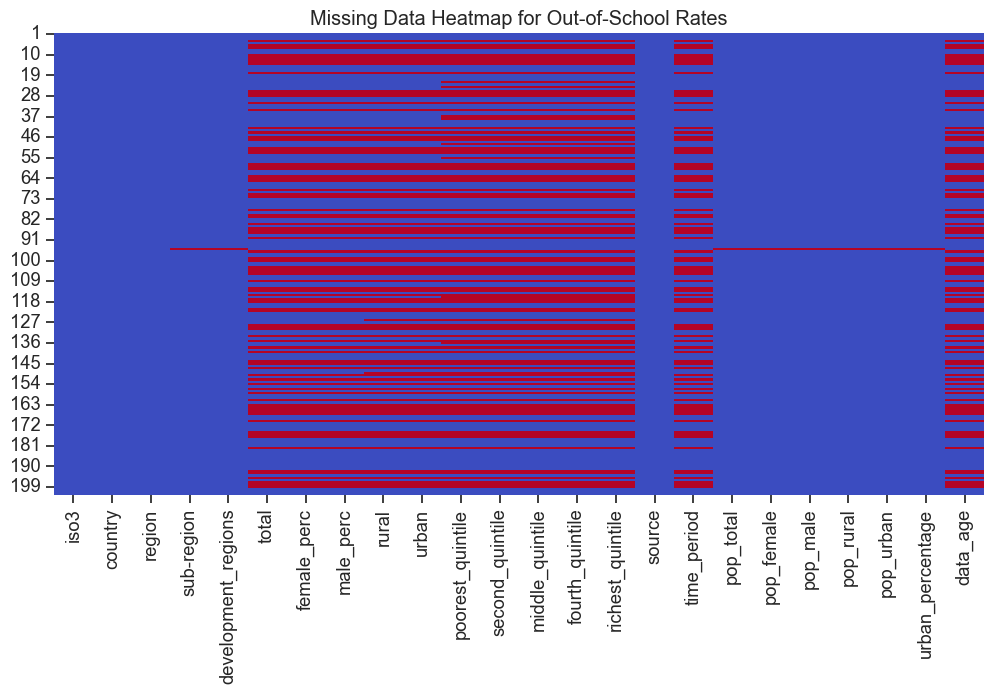

In [10]:
# Visualizing missing data with a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df_countries.isnull(), cmap='coolwarm', cbar=False)
plt.title("Missing Data Heatmap for Out-of-School Rates")
plt.show()

In [11]:
#Check North America (NA) is not NaN for region
df_countries['region'].value_counts()
canada = df_countries.loc[df_countries['country']=='Canada']
df_countries.loc[34, 'region'] = 'NA'
usa = df_countries.loc[df_countries['country']=='United States']
df_countries.loc[195, 'region'] = 'NA'

In [12]:
df_countries['region'].value_counts()
df_countries[df_countries['region']=='EAP'].notnull().sum()

iso3                   33
country                33
region                 33
sub-region             33
development_regions    33
total                  16
female_perc            16
male_perc              16
rural                  15
urban                  15
poorest_quintile       13
second_quintile        13
middle_quintile        13
fourth_quintile        13
richest_quintile       13
source                 33
time_period            16
pop_total              33
pop_female             33
pop_male               33
pop_rural              33
pop_urban              33
urban_percentage       33
data_age               16
dtype: int64

In [13]:
# Define the grouping categories
categories = ['region', 'sub-region', 'development_regions']

# Dictionary to store missing data percentages for each category
missing_data_results = {}

for category in categories:
    # Group the dataset by the current category
    grouped_data = df_countries.groupby(category)

    # Dictionary to store missing data for the current category
    data_missing = {}

    # Iterate through each group
    for group_name, group_df in grouped_data:
        total_rows = len(group_df)  # Total countries in the group
        non_missing_rows = group_df['total'].count()  # Minimum non-null count across columns
        
        # Compute missing data percentage
        percentage_missing = ((total_rows - non_missing_rows) / total_rows) * 100
        data_missing[group_name] = percentage_missing  # Store in dictionary

    # Convert results to a DataFrame
    df_missing = pd.DataFrame.from_dict(data_missing, orient='index', columns=['Percentage Missing'])
    
    # Sort for better readability
    df_missing.sort_values(by='Percentage Missing', ascending=False, inplace=True)

    # Store results for each category
    missing_data_results[category] = df_missing

    # Display results
    print(f"\nMissing Data by {category.capitalize()}:")
    print(df_missing)


Missing Data by Region:
      Percentage Missing
NA            100.000000
ECA            69.090909
MENA           52.631579
EAP            51.515152
LAC            29.729730
SSA            14.583333
SA              0.000000

Missing Data by Sub-region:
      Percentage Missing
NA            100.000000
WE            100.000000
MENA           52.631579
EAP            51.515152
LAC            29.729730
EECA           23.809524
ESA            20.833333
WCA             8.333333
SA              0.000000

Missing Data by Development_regions:
                 Percentage Missing
Not Classified            83.333333
More Developed            82.000000
Less Developed            34.693878
Least Developed           10.638298


# Exploratory Data Analysis (EDA)

### 1. Overview of Weighted Out of School Rates by Category

## Weighted Out of School Analysis


In [14]:
#Calculate global weighted averages using the provided code
weighted_results = {'country': 'World', 'region':'World', 'sub-region': 'NaN', 'development_region': 'NaN'}


# Overall weighted average
df_filtered = df_countries.dropna(subset='total')
weighted_results['total'] = (df_filtered['total'] * df_filtered['pop_total']).sum() / df_filtered['pop_total'].sum()

# Gender dimension
df_filtered = df_countries.dropna(subset='female_perc')
weighted_results['female_perc'] = (df_filtered['female_perc'] * df_filtered['pop_female']).sum() / df_filtered['pop_female'].sum()
weighted_results['male_perc'] = (df_filtered['male_perc'] * df_filtered['pop_male']).sum() / df_filtered['pop_male'].sum()
weighted_results['gender_gap'] = weighted_results['female_perc'] - weighted_results['male_perc']

# Rural/Urban dimension
df_filtered = df_countries.dropna(subset='rural')
weighted_results['rural'] = (df_filtered['rural'] * df_filtered['pop_rural']).sum() / df_filtered['pop_rural'].sum()
weighted_results['urban'] = (df_filtered['urban'] * df_filtered['pop_urban']).sum() / df_filtered['pop_urban'].sum()
weighted_results['rural_urban_gap'] = weighted_results['rural'] - weighted_results['urban']

# Wealth quintiles
wealth_cols = ['poorest_quintile', 'second_quintile', 'middle_quintile', 'fourth_quintile', 'richest_quintile']
for col in wealth_cols:
    df_filtered = df_countries.dropna(subset=col)
    weighted_results[col] = (df_filtered[col] * df_filtered['pop_total']).sum() / df_filtered['pop_total'].sum()

weighted_results['wealth_gap'] = weighted_results[wealth_cols[0]] - weighted_results[wealth_cols[-1]]

weighted_df = pd.DataFrame([weighted_results])

# Print the global weighted results
print("\n1. Global Population-Weighted Out-of-School Rates")
print(f"Overall: {weighted_results['total']:.2f}%")

print(f"\nBy Gender:")
print(f"Female: {weighted_results['female_perc']:.2f}%")
print(f"Male: {weighted_results['male_perc']:.2f}%")
print(f"Gender Gap (F-M): {weighted_results['gender_gap']:.2f} percentage points")

print(f"\nBy Residence:")
print(f"Rural: {weighted_results['rural']:.2f}%")
print(f"Urban: {weighted_results['urban']:.2f}%")
print(f"Rural-Urban Gap: {weighted_results['rural_urban_gap']:.2f} percentage points")

print(f"\nBy Wealth Quintile:")
wealth_labels = ['Poorest', 'Second', 'Middle', 'Fourth', 'Richest']
for col, label in zip(wealth_cols, wealth_labels):
    print(f"{label}: {weighted_results[col]:.2f}%")
print(f"Poorest-Richest Gap: {weighted_results['wealth_gap']:.2f} percentage points")


1. Global Population-Weighted Out-of-School Rates
Overall: 10.81%

By Gender:
Female: 11.30%
Male: 10.46%
Gender Gap (F-M): 0.84 percentage points

By Residence:
Rural: 14.63%
Urban: 5.46%
Rural-Urban Gap: 9.17 percentage points

By Wealth Quintile:
Poorest: 23.30%
Second: 14.89%
Middle: 10.10%
Fourth: 6.84%
Richest: 3.32%
Poorest-Richest Gap: 19.98 percentage points


## 2. Overview of Population Weighted Out of School Rates by Region

In [15]:
# Calculate regional weighted averages
regional_results = []

for region in df_countries['region'].unique():
    region_data = df_countries[df_countries['region'] == region]
    
    # Skip regions with very few countries
    if len(region_data) < 3:
        continue
        
    result = {'region': region}
    
    # Overall weighted average for region
    region_filtered = region_data.dropna(subset='total')
    result['total'] = (region_filtered['total'] * region_filtered['pop_total']).sum() / region_filtered['pop_total'].sum()
    
    # Gender dimension for region
    region_filtered = region_data.dropna(subset='female_perc')
    result['female_perc'] = (region_filtered['female_perc'] * region_filtered['pop_female']).sum() / region_filtered['pop_female'].sum()
    result['male_perc'] = (region_filtered['male_perc'] * region_filtered['pop_male']).sum() / region_filtered['pop_male'].sum()
    result['gender_gap'] = result['female_perc'] - result['male_perc']
    
    # Rural/Urban dimension for region
    region_filtered = region_data.dropna(subset='rural')
    result['rural'] = (region_filtered['rural'] * region_filtered['pop_rural']).sum() / region_filtered['pop_rural'].sum()
    result['urban'] = (region_filtered['urban'] * region_filtered['pop_urban']).sum() / region_filtered['pop_urban'].sum()
    result['rural_urban_gap'] = result['rural'] - result['urban']
    
    # Wealth quintiles for region
    region_filtered = region_data.dropna(subset=col)
    for col in wealth_cols:
        region_filtered = region_data.dropna(subset=col)
        result[col] = (region_filtered[col] * region_filtered['pop_total']).sum() / region_filtered['pop_total'].sum()
    
    result['wealth_gap'] = result['poorest_quintile'] - result['richest_quintile']
    
    # Add population information
    region_filtered = region_data.dropna(subset='total')
    result['population_(millions)'] = region_filtered['pop_total'].sum() / 1_000_000
    result['countries'] = len(region_filtered)
    
    regional_results.append(result)

# Create DataFrame with regional results
regional_df = pd.DataFrame(regional_results)

# Concatenate DataFrame with world results
regional_df = pd.concat([regional_df, weighted_df], ignore_index=True)

# Display regional results
print("\n2. Regional Population-Weighted Out-of-School Rates")
regional_df
# Format for better display - key metrics by region
display_cols = ['region', 'total', 'female_perc', 'male_perc', 'gender_gap', 'rural', 'urban', 'wealth_gap',
                    'rural_urban_gap', 'population_(millions)', 'countries']
print(regional_df[display_cols].round(2))



2. Regional Population-Weighted Out-of-School Rates
  region  total  female_perc  male_perc  gender_gap  rural  urban  wealth_gap  rural_urban_gap  population_(millions)  countries
0     SA   9.66        10.63       8.86        1.77  11.32   5.90       16.76             5.42                 171.09        8.0
1    ECA   2.87         2.53       3.28       -0.75   2.26   2.62        2.47            -0.36                  13.67       17.0
2   MENA   6.57         7.47       5.83        1.64   8.66   4.56        9.30             4.10                  32.55        9.0
3    SSA  22.35        22.64      22.05        0.59  27.79  10.26       34.95            17.53                 182.55       41.0
4    LAC   1.45         1.41       1.75       -0.34   2.80   1.14        2.53             1.66                  53.82       26.0
5    EAP   3.87         3.85       4.08       -0.23   4.05   3.82        4.02             0.24                 166.52       16.0
6  World  10.81        11.30      10.46     

## 3. Regional Out of School Rates

Regional differences in out-of-school rates reflect broader development challenges. SSA's high rates (averaging ~22%) far exceeds the global average (~11%) highlight the combined impact of poverty, conflict, and infrastructure challenges. In contrast, high-income regions like North America show rates close to zero, demonstrating how economic resources influence educational outcomes. 

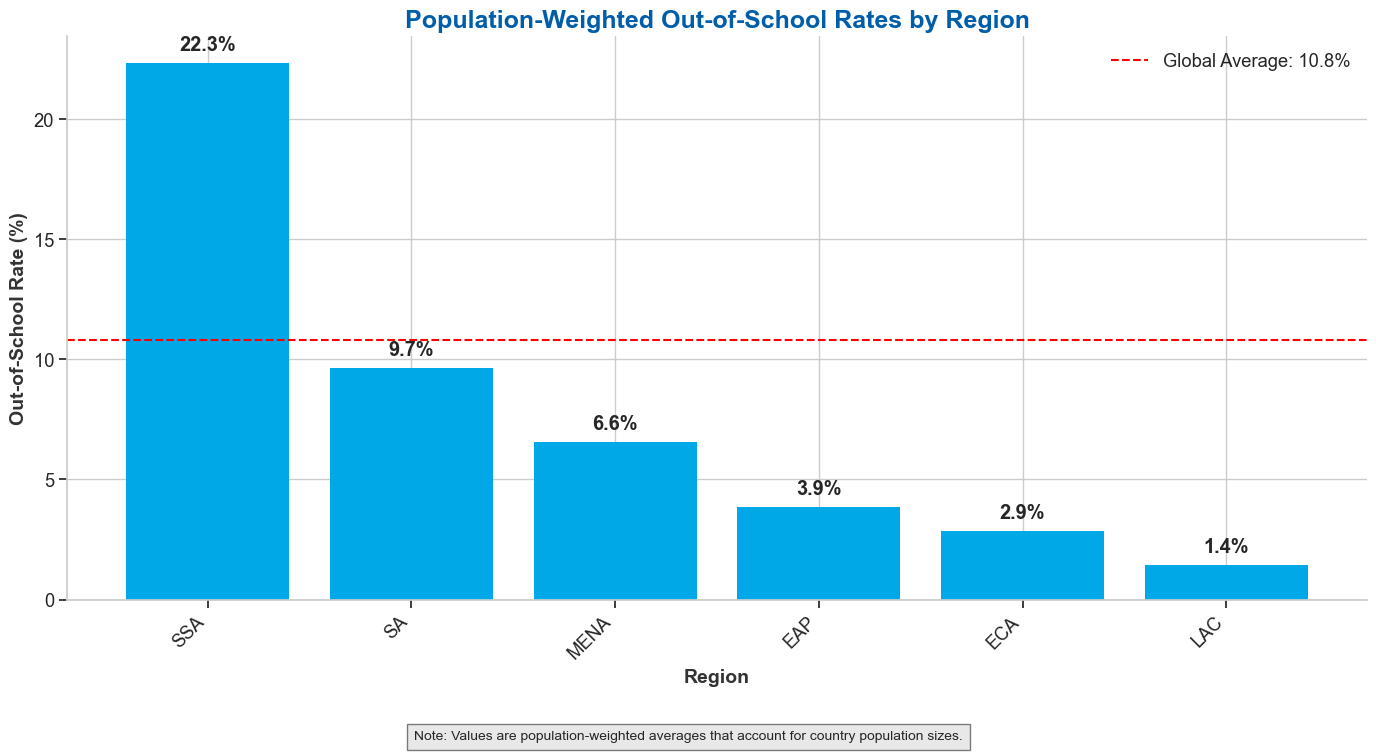

In [16]:
# 3. Create visualizations

plt.figure(figsize=(14, 8))

# Sort by total out-of-school rate and filter out World from analysis
plot_data = regional_df.sort_values('total', ascending=False)
plot_data = plot_data[plot_data['region'] != 'World']

# Create bar chart
bars = plt.bar(plot_data['region'], plot_data['total'], color='#00a8e8')

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}%', ha='center', fontweight='bold')


# Add global average line
plt.axhline(y=weighted_results['total'], color='red', linestyle='--', 
            label=f'Global Average: {weighted_results["total"]:.1f}%')

# Styling
plt.title('Population-Weighted Out-of-School Rates by Region', 
            fontsize=18, fontweight='bold', color='#005DAA')
plt.xlabel('Region', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Out-of-School Rate (%)', fontsize=14, fontweight='bold', color='#333333')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Add note about methodology
plt.figtext(0.5, 0.01, 
            "Note: Values are population-weighted averages that account for country population sizes.", 
            ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})

# Remove grid lines for a cleaner look
sns.despine()

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()



## 4. Gender Inequality Analysis

Globally, girls are slightly more disadvantaged when it comes to out of school rates as compared to boys. Gender disparity patterns may be a result of cultural and structural barriers to education. In regions where girls are disadvantaged (like parts of SSA, SA, and MENA), cultural/societal factors like early marriage, and safety concerns often play a role in school non-attendance. Where boys are disadvantaged (as in some LAC countries), economic pressures for males to work may be a factor. The data shows gender parity is achievable when specifically targeted.

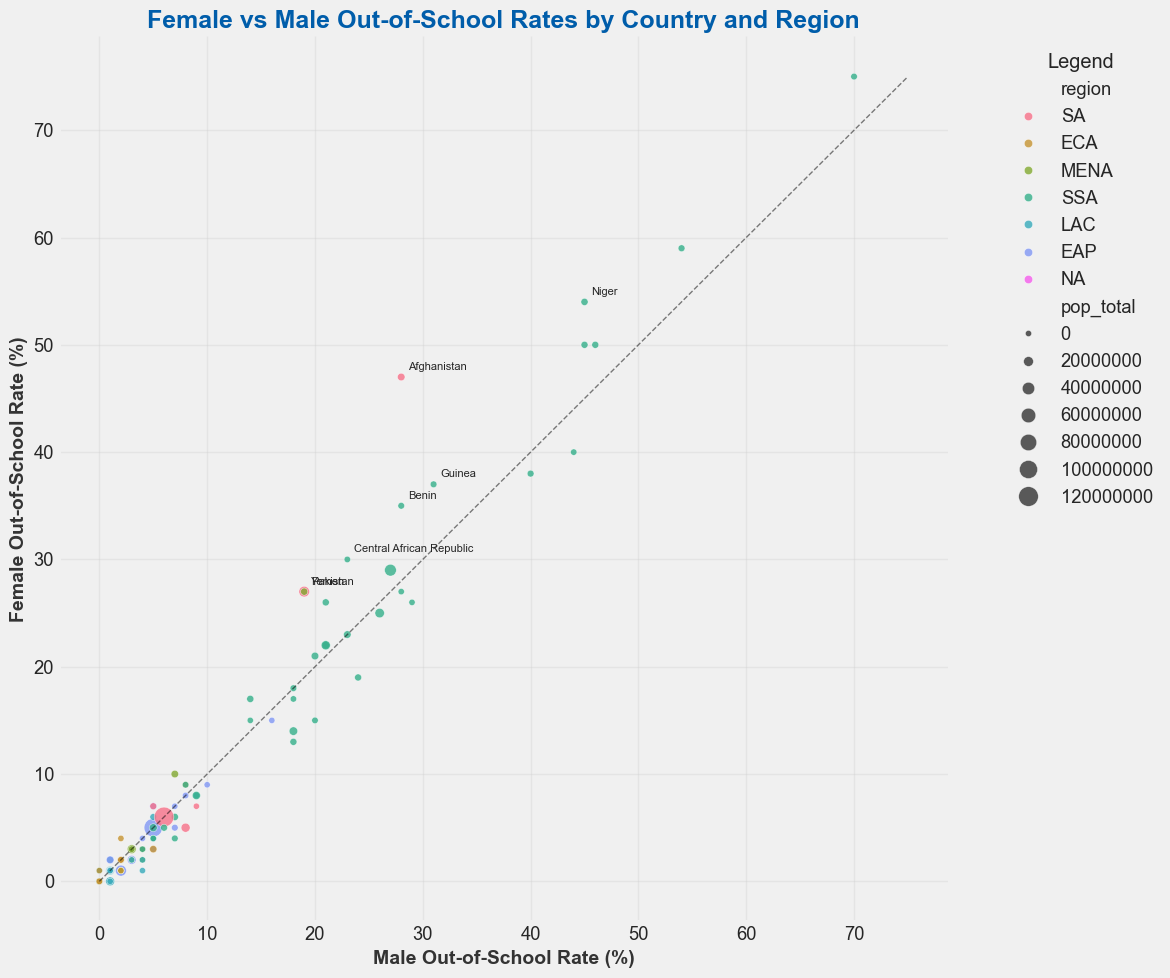

In [17]:
# Create a scatter plot comparing female vs male out-of-school rates
plt.style.use('fivethirtyeight')

plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=df_countries,
    x='male_perc',
    y='female_perc',
    hue='region',
    size='pop_total' if 'pop_total' in df_countries.columns else None,
    sizes=(20, 200),
    alpha=0.8
)

# Diagonal line (y=x) representing gender equality
max_val = max(df_countries['male_perc'].max(), df_countries['female_perc'].max())
plt.plot([0, max_val], [0, max_val], 'k--', alpha=0.5, linewidth=1)

# Add annotations for countries with extreme gender disparities
threshold = 5  # Absolute gender gap threshold
df_countries['gender_gap'] = df_countries['female_perc'] - df_countries['male_perc']
countries_to_annotate = df_countries[abs(df_countries['gender_gap']) > threshold]

for _, row in countries_to_annotate.iterrows():
    plt.annotate(
        row['country'],
        (row['male_perc'], row['female_perc']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=8
    )

plt.title('Female vs Male Out-of-School Rates by Country and Region', 
          fontsize=18, fontweight='bold', color='#005DAA')
plt.xlabel('Male Out-of-School Rate (%)', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Female Out-of-School Rate (%)', fontsize=14, fontweight='bold', color='#333333')
plt.grid(True, alpha=0.3)
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')

sns.despine()

plt.tight_layout()
plt.show()

Top 10 Countries with Largest Gender Gap in Out of School Rates: 
                      country region  gender_gap
1                 Afghanistan     SA        19.0
131                     Niger    SSA         9.0
201                     Yemen   MENA         8.0
137                  Pakistan     SA         8.0
35   Central African Republic    SSA         7.0
20                      Benin    SSA         7.0
74                     Guinea    SSA         6.0
48              Côte d'Ivoire    SSA         5.0
111                      Mali    SSA         5.0
169               South Sudan    SSA         5.0


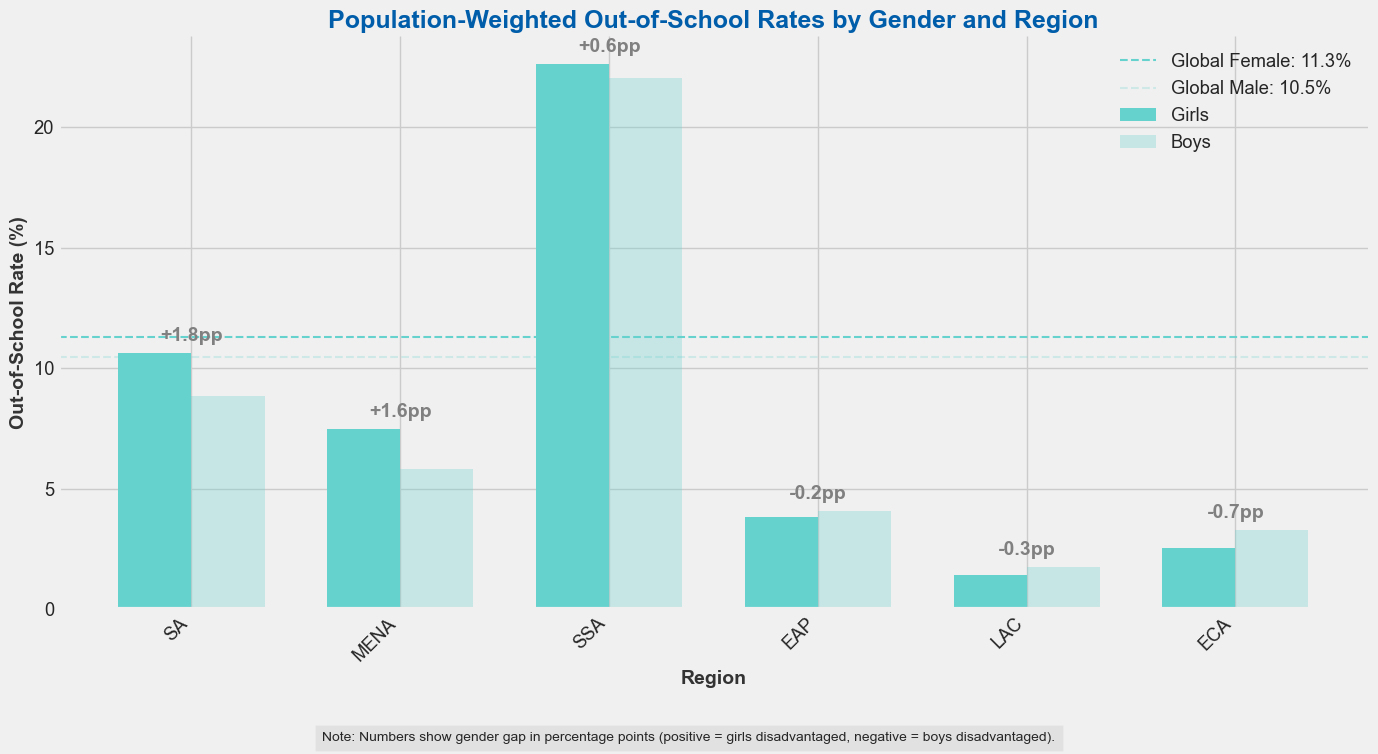

In [18]:
top10 = df_countries.sort_values(by='gender_gap', ascending=False)[['country', 'region', 'gender_gap']].head(10)
print(f'Top 10 Countries with Largest Gender Gap in Out of School Rates: \n{top10}')

plt.figure(figsize=(14, 8))

# Sort by gender gap
plot_data = plot_data.sort_values('gender_gap', ascending=False)

# Set up positions for grouped bars
x = range(len(plot_data))
width = 0.35

# Create grouped bar chart
plt.bar([i - width/2 for i in x], plot_data['female_perc'], width=width, 
        label='Girls', color='#66D2CE')
plt.bar([i + width/2 for i in x], plot_data['male_perc'], width=width, 
        label='Boys', color='#66D2CE', alpha=0.3)

# Add gap annotations
for i, row in enumerate(plot_data.itertuples()):
    gap_value = getattr(row, 'gender_gap')
    plt.annotate(f'{gap_value:+.1f}pp', 
                (i, max(getattr(row, 'female_perc'), getattr(row, 'male_perc')) + 0.5), 
                ha='center', fontweight='bold', color='grey')

# Add global average lines
plt.axhline(y=weighted_results['female_perc'], color='#66D2CE', linestyle='--', alpha=1, linewidth=1.5,
            label=f'Global Female: {weighted_results["female_perc"]:.1f}%')
plt.axhline(y=weighted_results['male_perc'], color='#66D2CE', linestyle='--', alpha=0.25, linewidth=1.5,
            label=f'Global Male: {weighted_results["male_perc"]:.1f}%')

# Styling
plt.title('Population-Weighted Out-of-School Rates by Gender and Region', 
            fontsize=18, fontweight='bold', color='#005DAA')
plt.xlabel('Region', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Out-of-School Rate (%)', fontsize=14, fontweight='bold', color='#333333')
plt.xticks(x, plot_data['region'], rotation=45, ha='right')
plt.legend()

# Add note about gender gap
plt.figtext(0.5, 0.01, 
            "Note: Numbers show gender gap in percentage points (positive = girls disadvantaged, negative = boys disadvantaged).", 
            ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})

# Remove grid lines for a cleaner look
sns.despine()

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()



## 5. Rural-Urban Divide Analysis

The consistent rural-urban gap across all regions (rural rates typically 1.5-2x urban rates) reflects infrastructure challenges, high-quality teacher shortages, and barriers to access in rural areas. This geographic divide is a fundamental structural barrier that requires targeted investment in rural areas.

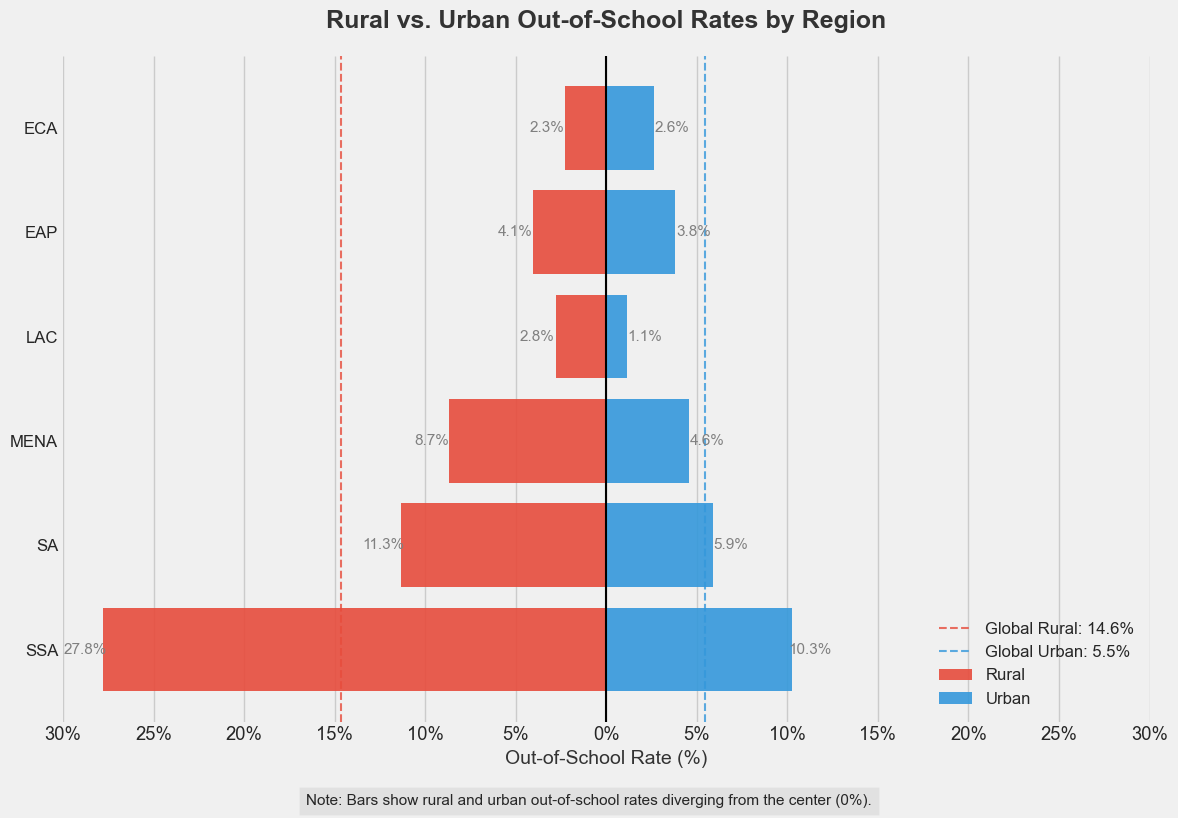

In [19]:
# Apply FiveThirtyEight style
plt.style.use('fivethirtyeight')

# Define FiveThirtyEight-style colors
rural_color = "#E74C3C"  # Dark Red
urban_color = "#3498DB"  # Muted Blue

# Figure setup
fig, ax = plt.subplots(figsize=(12, 8))

# Sort by rural-urban gap
plot_data = plot_data.sort_values('rural_urban_gap', ascending=False)

# Create horizontal diverging bar chart
ax.barh(plot_data['region'], -plot_data['rural'], label="Rural", color=rural_color, alpha=0.9)
ax.barh(plot_data['region'], plot_data['urban'], label="Urban", color=urban_color, alpha=0.9)

# Add central axis line at 0%
ax.axvline(0, color="black", linewidth=1.5, linestyle="-")

# Add global average lines
ax.axvline(-weighted_results['rural'], color=rural_color, linestyle='--', alpha=0.8, linewidth=1.5,
           label=f'Global Rural: {weighted_results["rural"]:.1f}%')
ax.axvline(weighted_results['urban'], color=urban_color, linestyle='--', alpha=0.8, linewidth=1.5,
           label=f'Global Urban: {weighted_results["urban"]:.1f}%')

# Title and labels
ax.set_title("Rural vs. Urban Out-of-School Rates by Region", fontsize=18, fontweight="bold", color="#333333", pad=20)
ax.set_xlabel("Out-of-School Rate (%)", fontsize=14, color="#333333")
ax.set_ylabel("")  # Remove redundant label (already shown by bars)
ax.set_xticks(range(-30, 31, 5))  # Set ticks symmetrically
ax.set_xticklabels([f"{abs(x)}%" for x in range(-30, 31, 5)])  # Remove negative signs for clarity
ax.tick_params(axis='y', labelsize=12, color="#333333")

# Remove chart borders for a cleaner look
sns.despine(left=True, bottom=True)

# Add note about rural-urban gap
fig.text(0.5, -0.02, "Note: Bars show rural and urban out-of-school rates diverging from the center (0%).",
         ha="center", fontsize=11, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})

# Add labels inside bars
for i, row in enumerate(plot_data.itertuples()):
    # Rural label inside the left bar (negative side)
    ax.text(-getattr(row, 'rural') - 1, i, f'{getattr(row, "rural"):.1f}%', ha='center', va='center', 
            fontsize=11, fontweight='roman', color='grey')
    
    # Urban label inside the right bar (positive side)
    ax.text(getattr(row, 'urban') + 1, i, f'{getattr(row, "urban"):.1f}%', ha='center', va='center',
            fontsize=11, fontweight='light', color='grey')

# Display legend with proper placement
ax.legend(frameon=False, fontsize=12, loc="lower right")

# Show plot
plt.tight_layout()
plt.grid(axis='y')
plt.show()

## 6. Wealth Gap Analysis

The stark gradient across wealth quintiles (poorest children 3-5x more likely to be out of school than richest) demonstrates how poverty remains the most persistent barrier to education access. The poorest quintile has out-of-school rates of 20-40% in the most affected regions, while the richest quintile often has rates below 5% even in those same regions.

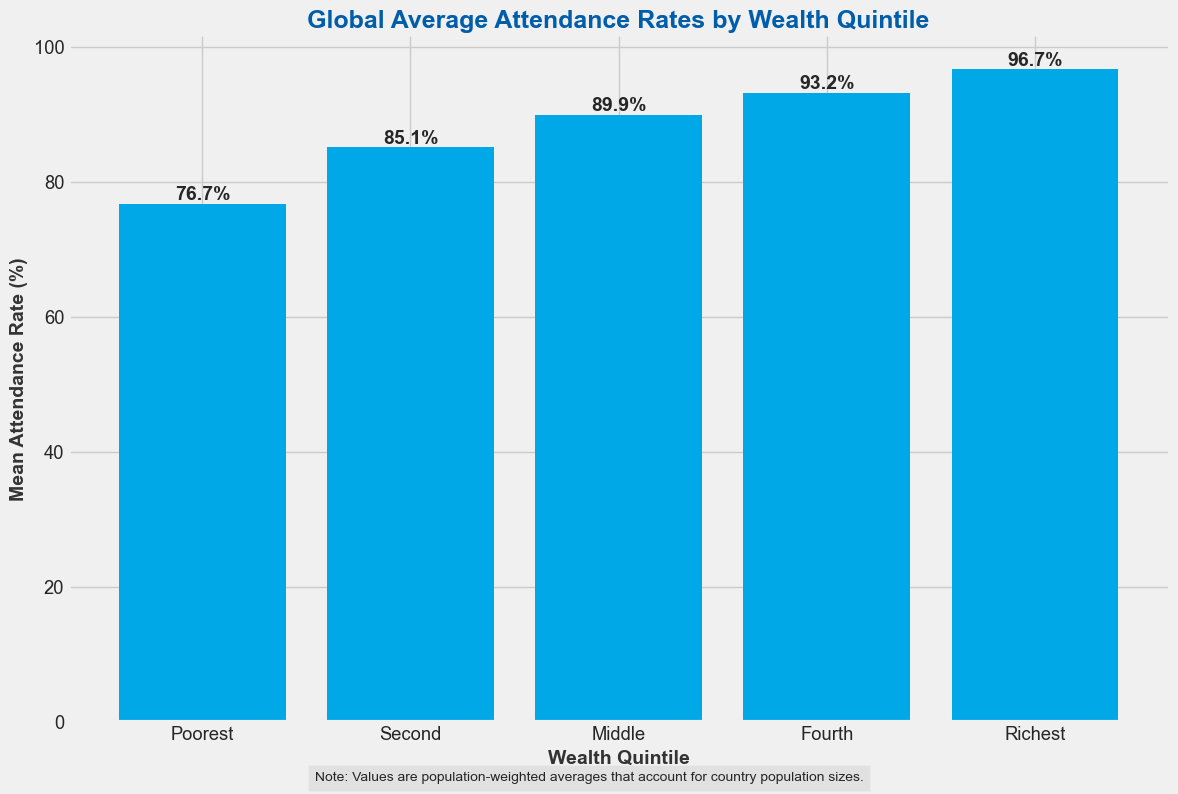

In [20]:
# Attendance Rate by Wealth Quintile

# Identify wealth quintile columns based on what's in the dataframe
wealth_cols = ['poorest_quintile', 'second_quintile', 'middle_quintile', 'fourth_quintile', 'richest_quintile']



# 1. Calculate mean out-of-school rates by quintile
quintile_means = weighted_df[wealth_cols].mean(numeric_only=True)

#Calculate % of students that attend school
avg_attendance = weighted_df['avg_attendance_by_quintile'] = 100 - quintile_means

# Create labels for display
quintile_labels = ['Poorest', 'Second', 'Middle', 'Fourth', 'Richest']

# 2. Visualize overall quintile means
plt.figure(figsize=(12, 8))

# Create bar chart
bars = plt.bar(range(len(quintile_means)), avg_attendance, color='#00a8e8')

# Add data labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}%', ha='center', fontweight='bold')

# Styling
plt.title('Global Average Attendance Rates by Wealth Quintile', 
            fontsize=18, fontweight='bold', color='#005DAA')
plt.xlabel('Wealth Quintile', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Mean Attendance Rate (%)', fontsize=14, fontweight='bold', color='#333333')
plt.xticks(range(len(quintile_means)), quintile_labels)

# Add note about methodology
plt.figtext(0.5, 0.01, 
            "Note: Values are population-weighted averages that account for country population sizes.", 
            ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})

# Remove grid lines for a cleaner look
sns.despine()

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

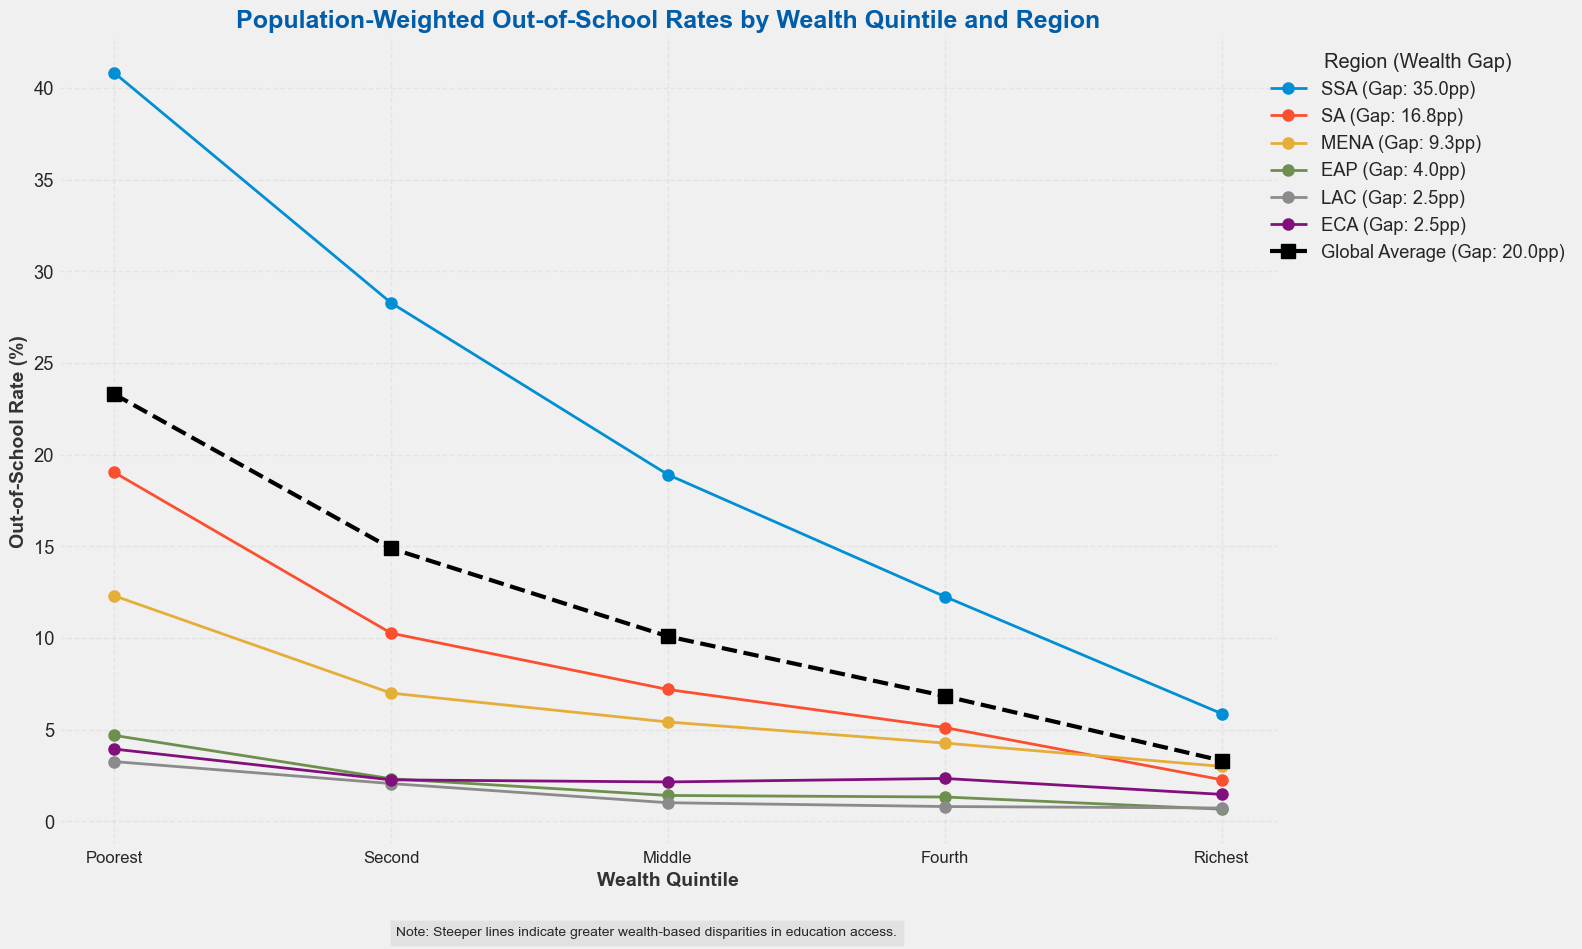

In [21]:
# Apply FiveThirtyEight style
plt.style.use('fivethirtyeight')

plt.figure(figsize=(14, 10))

# Sort by wealth gap
plot_data = plot_data.sort_values('wealth_gap', ascending=False)

# Rename x-axis labels
quintile_labels = ['Poorest', 'Second', 'Middle', 'Fourth', 'Richest']

# Create line plot for each region, storing legend labels with wealth gaps
legend_labels = []

for region in plot_data['region'].unique():
    region_data = plot_data[plot_data['region'] == region]
    quintile_values = [region_data[label].values[0] for label in wealth_cols]
    
    # Compute the wealth gap (Poorest - Richest)
    wealth_gap = region_data['wealth_gap'].values[0]
    

    
    # Add line plot
    plt.plot(quintile_labels, quintile_values, marker='o', linewidth=2, markersize=8, 
             label=f"{region} (Gap: {wealth_gap:.1f}pp)")
    
    # Store legend label
    legend_labels.append(f"{region} (Gap: {wealth_gap:.1f}pp)")

# Add global average line
global_quintiles = [weighted_results[col] for col in wealth_cols]
plt.plot(quintile_labels, global_quintiles, marker='s', linewidth=3, markersize=10, 
         label=f"Global Average (Gap: {weighted_results['wealth_gap']:.1f}pp)", 
         color='black', linestyle='--')

# Styling
plt.title('Population-Weighted Out-of-School Rates by Wealth Quintile and Region', 
          fontsize=18, fontweight="bold", color="#005DAA")
plt.xlabel('Wealth Quintile', fontsize=14, fontweight="bold", color="#333333")
plt.ylabel('Out-of-School Rate (%)', fontsize=14, fontweight="bold", color="#333333")
plt.xticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Create custom legend
plt.legend(title='Region (Wealth Gap)', loc='upper right', bbox_to_anchor=(1.25, 1))

# Add note about trends
plt.figtext(0.5, -0.02, 
            "Note: Steeper lines indicate greater wealth-based disparities in education access.", 
            ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})

# Remove grid lines for a cleaner look
sns.despine()

plt.tight_layout

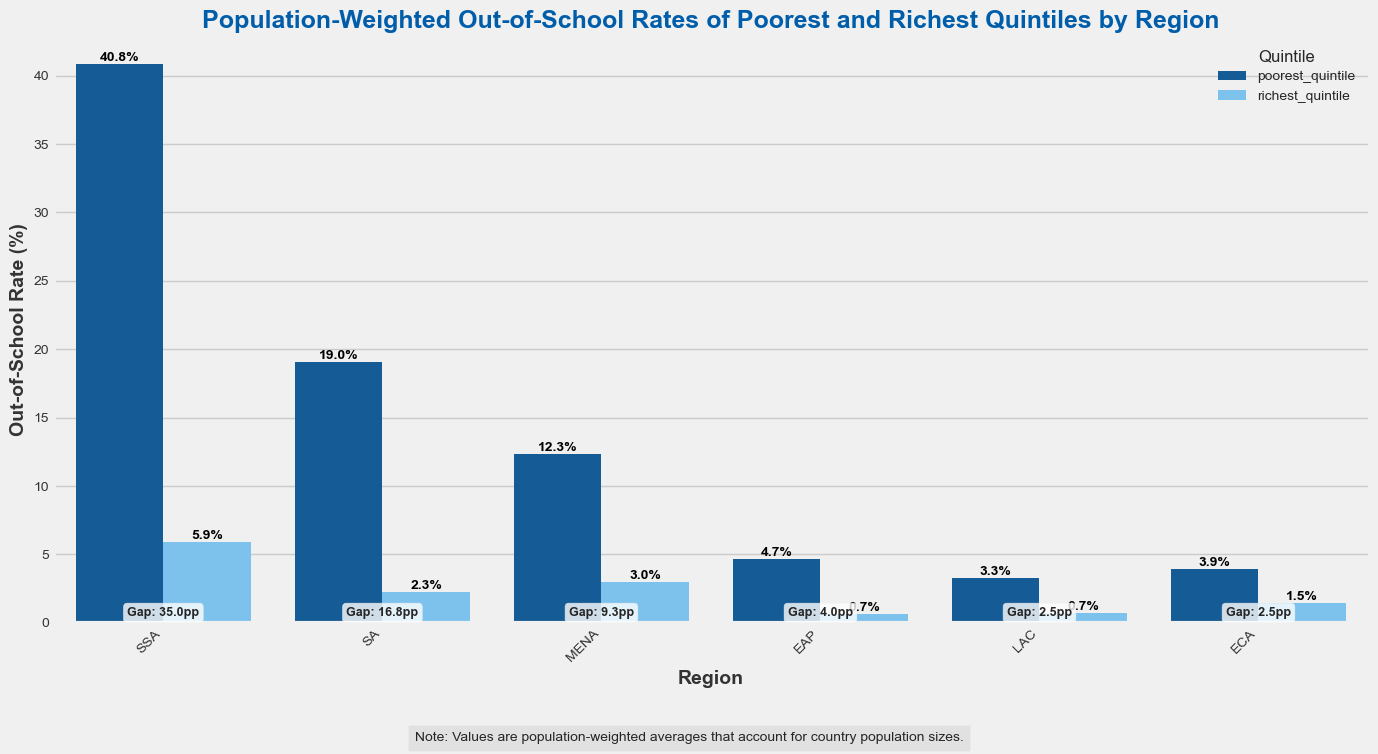

In [22]:
# 6.2. Comparison of Poorest and Richest Quintiles by Region
# Prepare data for visualization
quintile_cols = ['poorest_quintile', 'richest_quintile']

# Melt the dataframe for easier plotting
melted_df = pd.melt(
    regional_df,
    id_vars=['region', 'wealth_gap'],
    value_vars=quintile_cols,
    var_name='Quintile',
    value_name='Percentage'
)

# Sort regions by wealth gap for better visualization
region_filtered = regional_df[regional_df['region'] != 'World']
region_order = region_filtered.sort_values('wealth_gap', ascending=False)['region'].tolist()
melted_df['region'] = pd.Categorical(melted_df['region'], categories=region_order, ordered=True)

# Create the visualization
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='region', y='Percentage', hue='Quintile', data=melted_df, 
                palette=sns.color_palette(['#005DAA', '#6BC6FF']), errorbar=None)

plt.title('Population-Weighted Out-of-School Rates of Poorest and Richest Quintiles by Region', 
            fontsize=18, fontweight='bold', color='#005DAA')
plt.xlabel('Region', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Out-of-School Rate (%)', fontsize=14, fontweight='bold', color='#333333')
plt.xticks(rotation=45, ha='right', fontsize=10, color='#333333')
plt.yticks(fontsize=10, color='#333333')

# Annotate bars with values
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.1f}%',  # Format to one decimal place
                    (p.get_x() + p.get_width() / 2, p.get_height()),  # Position on top of the bar
                    ha='center', va='bottom',  # Center align
                    fontsize=10, fontweight='bold', color='black')  # Styling

# Add gap annotations
for i, region in enumerate(region_order):
    gap = region_filtered[region_filtered['region'] == region]['wealth_gap'].values[0]
    plt.text(i, 0.5, f'Gap: {gap:.1f}pp', ha='center', fontsize=9, fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.3'))

plt.legend(title='Quintile', title_fontsize=12, fontsize=10, frameon=False)

# Add note about weighting
plt.figtext(0.5, 0.01, 
            "Note: Values are population-weighted averages that account for country population sizes.", 
            ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})

sns.despine()

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

/var/folders/zx/lf_wg15n4zd4rby59s1zm2v40000gn/T/ipykernel_92920/3455394678.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='region', y='wealth_gap', data=regional_df, order=['World', 'SSA', 'SA', 'MENA', 'EAP', 'ECA', 'LAC'], palette = 'YlGnBu_r')


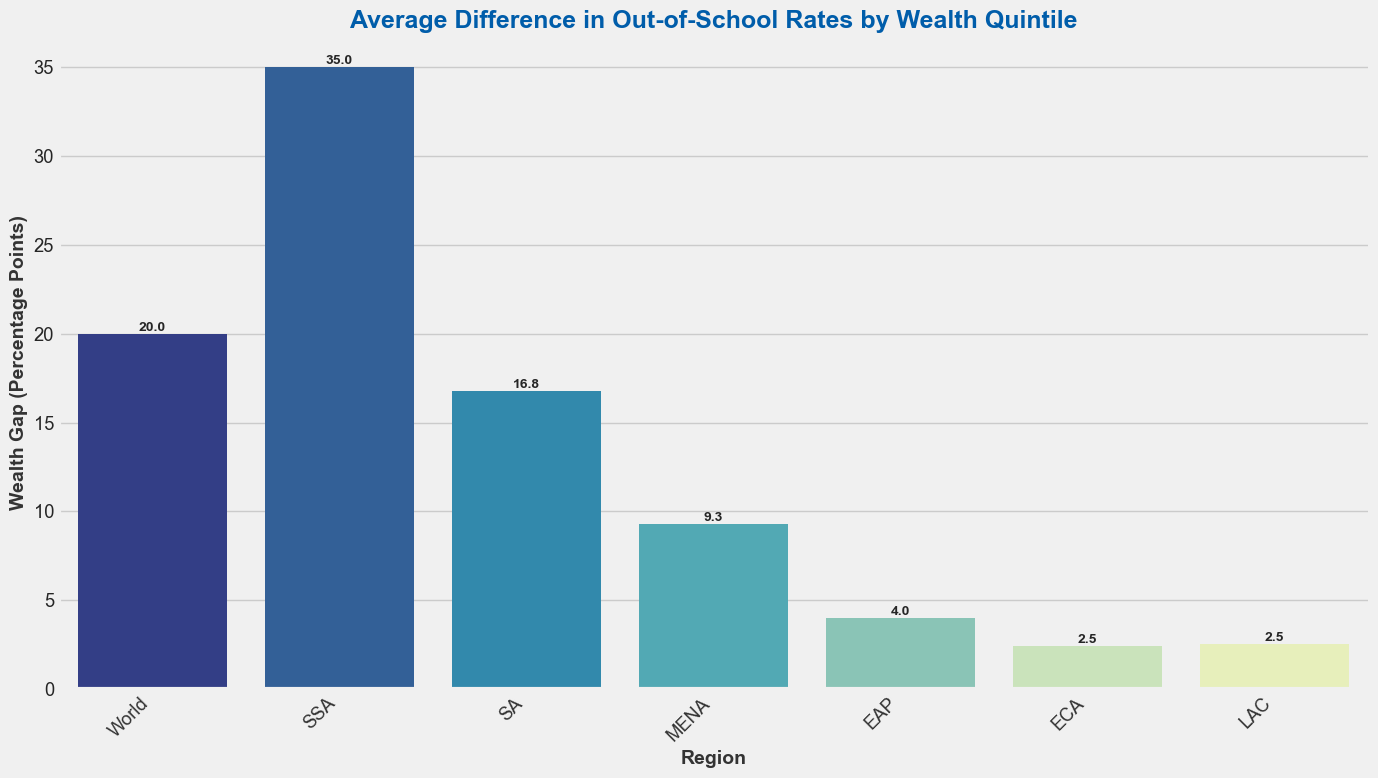

In [23]:
# Wealth Gap Visualization
plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='region', y='wealth_gap', data=regional_df, order=['World', 'SSA', 'SA', 'MENA', 'EAP', 'ECA', 'LAC'], palette = 'YlGnBu_r')

plt.title('Average Difference in Out-of-School Rates by Wealth Quintile', 
          fontsize=18, fontweight='bold', color='#005DAA')
plt.xlabel('Region', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Wealth Gap (Percentage Points)', fontsize=14, fontweight='bold', color='#333333')
plt.xticks(rotation=45, ha='right', color='#333333')

for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'bottom', fontsize=10, fontweight='bold')

sns.despine()

plt.tight_layout()
plt.show()

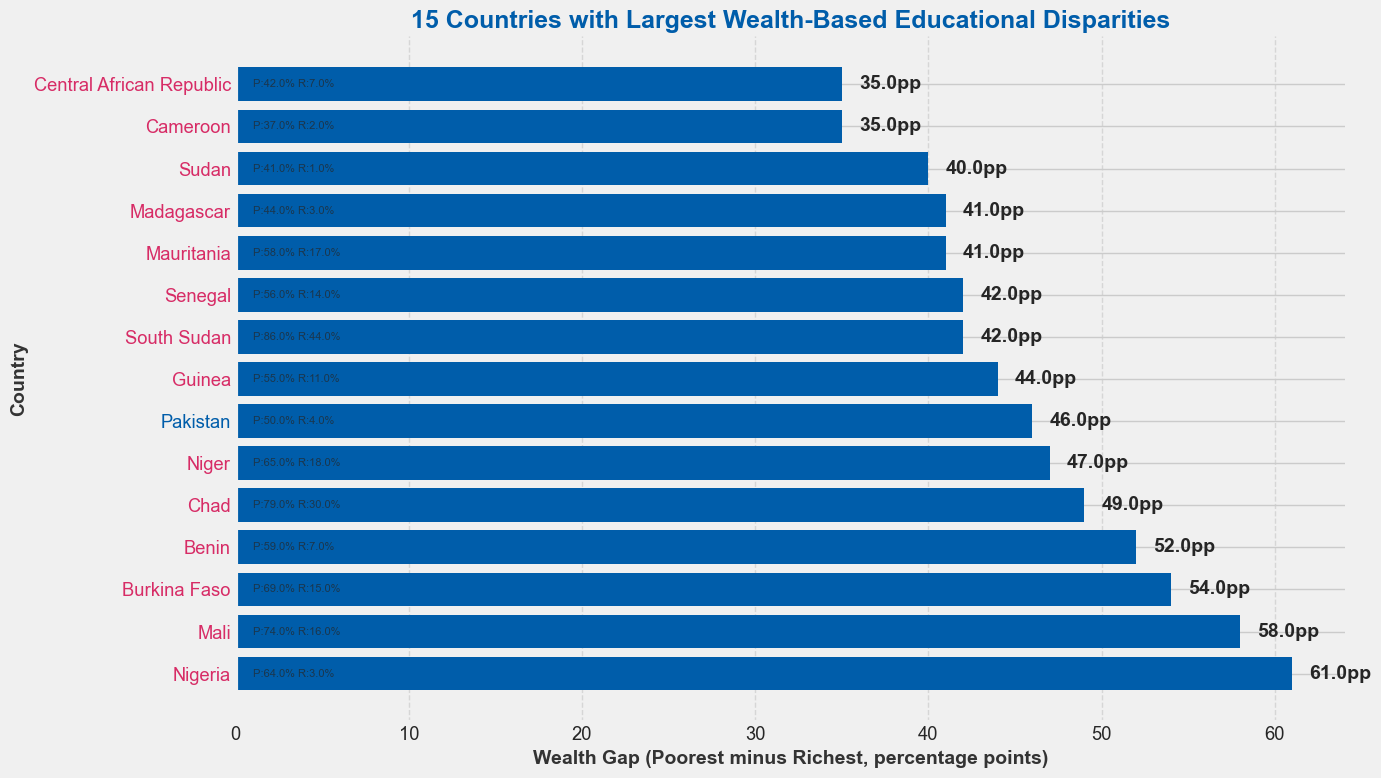

In [24]:
#Calculate and visualize quintile gap (poorest minus richest)
df_countries['quintile_gap'] = df_countries[wealth_cols[0]] - df_countries[wealth_cols[-1]]

# Find countries with largest quintile gaps
largest_gaps = df_countries.sort_values('quintile_gap', ascending=False).head(15)

plt.figure(figsize=(14, 8))

# Create horizontal bar chart
bars = plt.barh(y=largest_gaps['country'], width=largest_gaps['quintile_gap'], 
                color='#005DAA')

# Add data labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
            f'{width:.1f}pp', ha='left', va='center', fontweight='bold')
    
    # Add poorest and richest values in small text
    plt.text(1, bar.get_y() + bar.get_height()/2, 
            f'P:{largest_gaps.iloc[i][wealth_cols[0]]:.1f}% R:{largest_gaps.iloc[i][wealth_cols[-1]]:.1f}%', 
            ha='left', va='center', fontsize=8, alpha=0.7)

# Styling
plt.title('15 Countries with Largest Wealth-Based Educational Disparities', 
            fontsize=18, fontweight='bold', color='#005DAA')
plt.xlabel('Wealth Gap (Poorest minus Richest, percentage points)', 
            fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Country', fontsize=14, fontweight='bold', color='#333333')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Color-code by region
region_colors = {'SSA': '#D72C66', 'SA': '#005DAA', 'MENA': '#00833D', 
                'LAC': '#F26A21', 'EAP': '#6BC6FF', 'ECA': '#80BD41'}

for i, country in enumerate(largest_gaps['country']):
    region = largest_gaps.iloc[i]['region']
    color = region_colors.get(region, 'gray')
    plt.gca().get_yticklabels()[i].set_color(color)

# Remove grid lines for a cleaner look
sns.despine()

plt.tight_layout()
plt.show()

# 7. Distribution of Out of School Percentage by Region


3. Estimated Numbers of Out-of-School Children
Total analyzed population: 620,201,658 children
Total out-of-school children: 67,072,117 (10.81%)

By Gender:
  Female: 33,855,704 out-of-school girls (11.30%)
  Male: 33,533,084 out-of-school boys (10.46%)

By Residence:
  Rural: 48,081,848 out-of-school rural children (14.63%)
  Urban: 15,874,235 out-of-school urban children (5.46%)

By Region:
  SSA: 40,797,729 children (60.8% of global total)
  SA: 16,523,858 children (24.6% of global total)
  EAP: 6,440,193 children (9.6% of global total)
  MENA: 2,138,406 children (3.2% of global total)
  LAC: 780,334 children (1.2% of global total)
  ECA: 391,596 children (0.6% of global total)


/var/folders/zx/lf_wg15n4zd4rby59s1zm2v40000gn/T/ipykernel_92920/2840612048.py:44: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '16523857.95' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  regional_df.loc[idx, 'oos_children'] = region_pop * row['total'] / 100


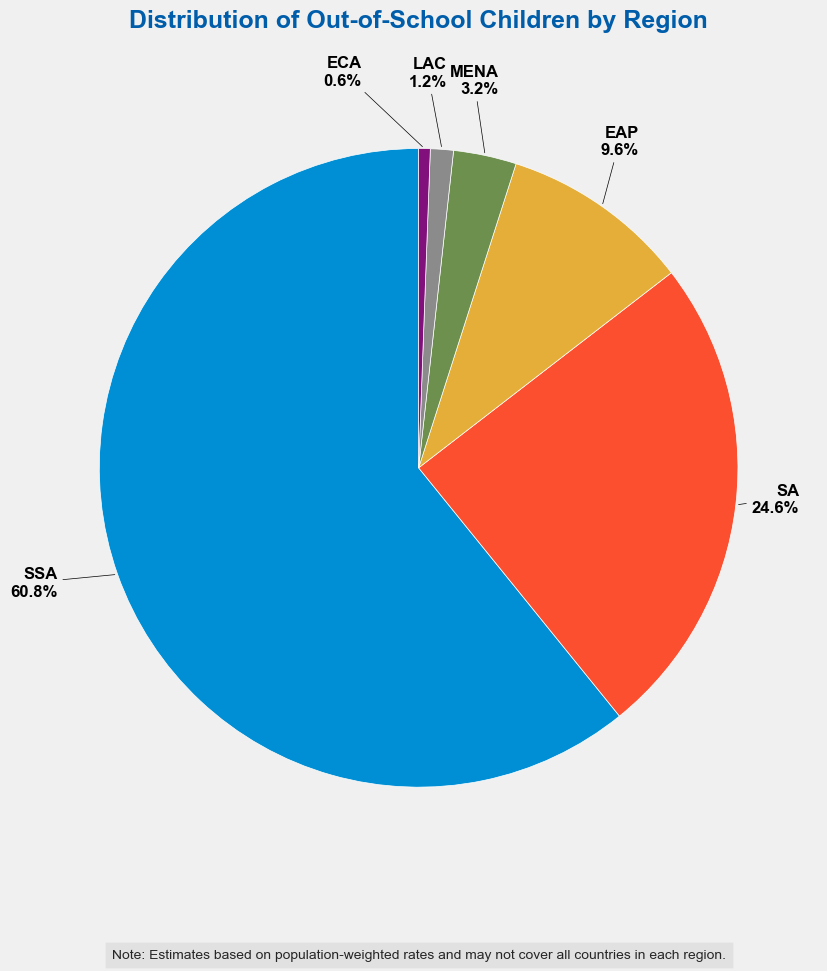

In [25]:
# Global estimate based on countries with corresponding entry in 'total' column
df_filtered = df_countries.dropna(subset='total')
df_filtered = df_filtered[df_filtered['region'] != 'World']
total_population = df_filtered['pop_total'].sum()
total_oos_children = total_population * weighted_results['total'] / 100

print("\n3. Estimated Numbers of Out-of-School Children")
print(f"Total analyzed population: {total_population:,.0f} children")
print(f"Total out-of-school children: {total_oos_children:,.0f} ({weighted_results['total']:.2f}%)")

# By gender
female_population = df_filtered['pop_female'].sum()
male_population = df_filtered['pop_male'].sum()

female_oos = female_population * weighted_results['female_perc'] / 100
male_oos = male_population * weighted_results['male_perc'] / 100

print(f"\nBy Gender:")
print(f"  Female: {female_oos:,.0f} out-of-school girls ({weighted_results['female_perc']:.2f}%)")
print(f"  Male: {male_oos:,.0f} out-of-school boys ({weighted_results['male_perc']:.2f}%)")

# By residence
#Filter out countries without 'rural' value
df_filtered_rural = df_countries.dropna(subset='rural')
df_filtered_rural = df_filtered_rural[df_filtered_rural['region'] != 'World']
rural_population = df_filtered_rural['pop_rural'].sum()
urban_population = df_filtered_rural['pop_urban'].sum()

rural_oos = rural_population * weighted_results['rural'] / 100
urban_oos = urban_population * weighted_results['urban'] / 100

print(f"\nBy Residence:")
print(f"  Rural: {rural_oos:,.0f} out-of-school rural children ({weighted_results['rural']:.2f}%)")
print(f"  Urban: {urban_oos:,.0f} out-of-school urban children ({weighted_results['urban']:.2f}%)")

# By region

regional_df['oos_children'] = 0

for idx, row in regional_df.iterrows():
    region = row['region']
    region_data = df_filtered[df_filtered['region'] == region]
    region_pop = region_data['pop_total'].sum()
    regional_df.loc[idx, 'oos_children'] = region_pop * row['total'] / 100

regional_df['percent_of_global'] = regional_df['oos_children'] / total_oos_children * 100

print("\nBy Region:")
region_oos = regional_df[regional_df['region'] != 'World']
region_oos = region_oos[['region', 'oos_children', 'percent_of_global']].sort_values('oos_children', ascending=False)

for _, row in region_oos.iterrows():
    print(f"  {row['region']}: {row['oos_children']:,.0f} children ({row['percent_of_global']:.1f}% of global total)")


#Create pie chart
fig, ax = plt.subplots(figsize=(12, 10))

# Plot pie chart without labels
wedges, texts = ax.pie(
    region_oos['oos_children'], 
    labels=None,
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)

# Define regions to shift left
shift_left_regions = {'ECA'}

# Add text labels outside the pie with leader lines
for wedge, region, percent in zip(wedges, region_oos['region'], region_oos['percent_of_global']):
    # Get the angle of the wedge's center
    angle = (wedge.theta2 + wedge.theta1) / 2
    x = 1.2 * np.cos(np.radians(angle))  # Extend text outward
    y = 1.2 * np.sin(np.radians(angle))

    # If the region is in shift_left_regions, move it further left
    if region in shift_left_regions:
        x -= 0.2  # Shift left

    # Align text left/right based on quadrant
    ha = "left" if angle < 180 else "right"

    # Draw a line from the wedge to the text
    ax.annotate(f"{region}\n{percent:.1f}%", 
                xy=(np.cos(np.radians(angle)), np.sin(np.radians(angle))), 
                xytext=(x, y),
                ha=ha, fontsize=12, fontweight="bold", color="black",
                arrowprops=dict(arrowstyle="-", color="black"))

# Title and styling
plt.title('Distribution of Out-of-School Children by Region', 
          fontsize=18, fontweight='bold', color='#005DAA', pad=30)

# Add note about data coverage
plt.figtext(0.5, -0.02, 
            "Note: Estimates based on population-weighted rates and may not cover all countries in each region.", 
            ha="center", fontsize=10, bbox={"facecolor":"lightgrey", "alpha":0.5, "pad":5})

plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

## 8. Identifying Countries with Highest Out-of-School Rates

/var/folders/zx/lf_wg15n4zd4rby59s1zm2v40000gn/T/ipykernel_92920/2084320911.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='total', y='country', data=top_countries, palette='viridis')


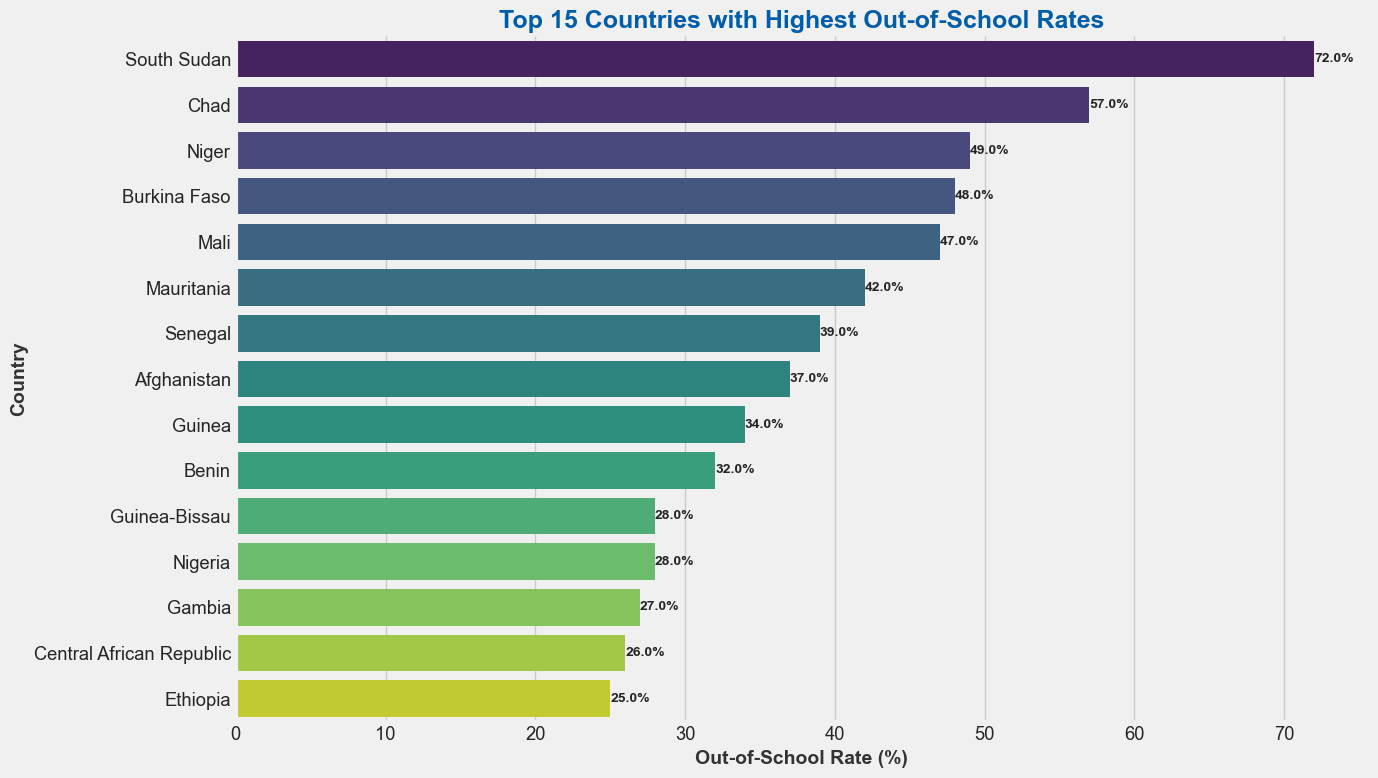

In [26]:
# Get top 15 countries with highest out-of-school rates
top_countries = df_countries.sort_values('total', ascending=False).head(15)

plt.figure(figsize=(14, 8))
barplot = sns.barplot(x='total', y='country', data=top_countries, palette='viridis')

plt.title('Top 15 Countries with Highest Out-of-School Rates', 
          fontsize=18, fontweight='bold', color='#005DAA')
plt.xlabel('Out-of-School Rate (%)', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Country', fontsize=14, fontweight='bold', color='#333333')

# Annotate bars with values
for p in barplot.patches:
    barplot.annotate(f'{p.get_width():.1f}%', 
                    (p.get_width(), p.get_y() + p.get_height() / 2.), 
                    ha = 'left', va = 'center', fontsize=10, fontweight='bold')

# Remove grid lines for a cleaner look
sns.despine()

plt.tight_layout()
plt.show()

## 9. Development Status and Education Access

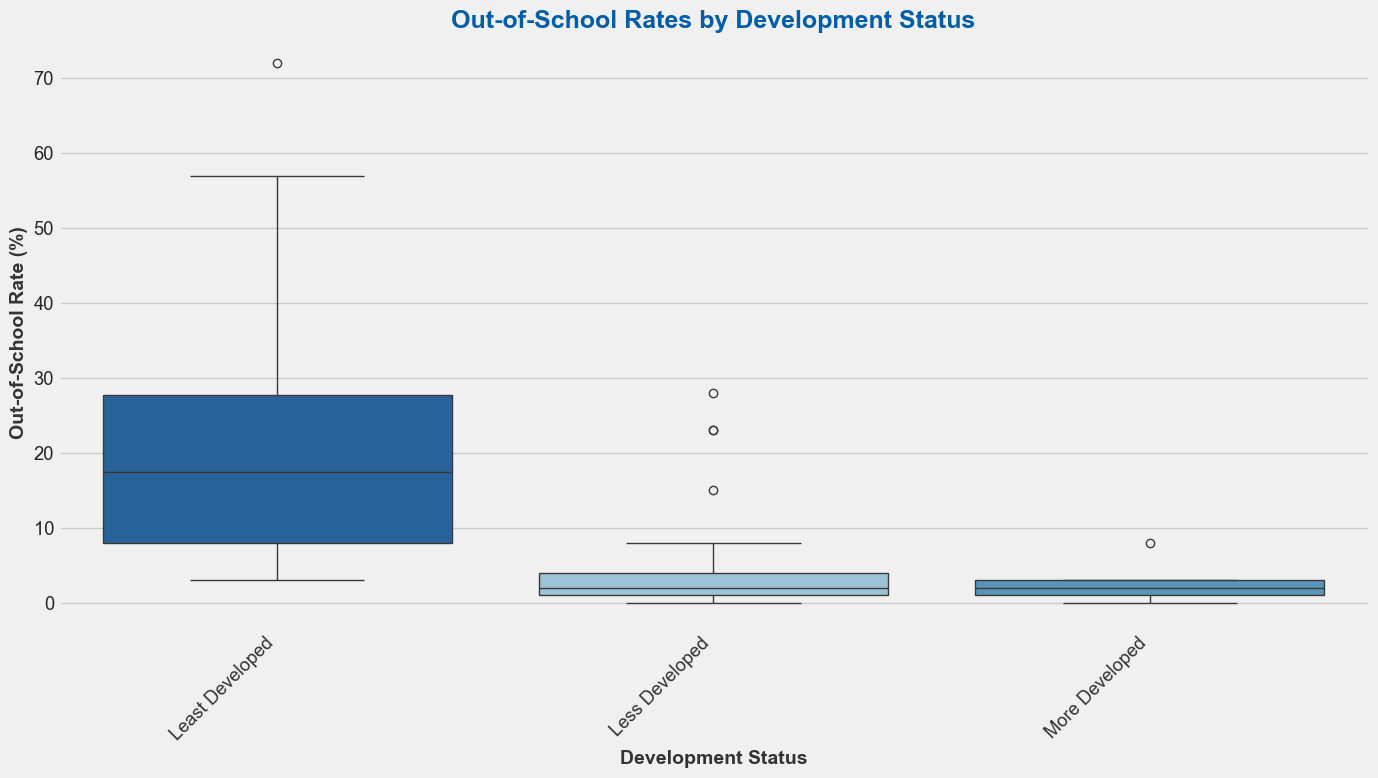

In [27]:
# Create a boxplot to compare out-of-school rates by development status
plt.figure(figsize=(14, 8))
sns.boxplot(x='development_regions', y='total', data=df_countries.loc[df_countries['development_regions'] != 'Unknown'], palette='Blues_r',
            hue = 'development_regions',
            legend=False,
            order=['Least Developed', 'Less Developed', 'More Developed'])

plt.title('Out-of-School Rates by Development Status', 
          fontsize=18, fontweight='bold', color='#005DAA')
plt.xlabel('Development Status', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Out-of-School Rate (%)', fontsize=14, fontweight='bold', color='#333333')
plt.xticks(rotation=45, ha='right', color='#333333')

sns.despine()

plt.tight_layout()
plt.show()

## Summary
This analysis provides valuable insights into global patterns of primary school exclusion and highlights areas requiring urgent intervention. The substantial disparities based on gender, geography, and wealth underscore the need for targeted, context-specific approaches rather than one-size-fits-all solutions.

These findings align with UNICEF's focus on equitable education access and demonstrate the continued challenges in achieving universal primary education.
## Based on the analysis of global out-of-school rates for primary school aged children:

1. **Regional Disparities**: Sub-Saharan Africa (SSA), South Asia (SA), and Middle East and North Africa (MENA) have the highest out-of-school rates, with SSA facing the most severe challenges.

2. **Scale of Problem**: Approximately 10.8% of primary school-aged children globally are out of school, with significant regional variations.

3. **Gender Disparities**: Gender gaps vary considerably by region - girls are more disadvantaged in Sub-Saharan Africa (SSA), Southeast Asia (SA), and parts of Middle East and North Africa (MENA), while boys are disadvantaged in some regions like Latin America and the Caribbean (LAC), East Asia-Pacific (EAP), and Europe and Central Asia (ECA).

4. **Geographic Divide**: Rural children consistently have higher out-of-school rates than urban children across all regions, with the rural-urban gap most pronounced in SSA, SA, and MENA.

5. **Wealth Inequality**: The wealth gap in education access is the most consistent and extreme form of disparity across all regions. Children from the poorest quintile are significantly more likely to be out of school than those from the richest quintile, especially in SSA.

6. **Intersecting Disadvantages**: Many countries face multiple overlapping disadvantages (gender, geographic, and wealth-based), with different regions showing different patterns of disparity.

## Conclusions and Recommendations

### Conclusions
1. Education access disparities are not random but follow clear patterns related to wealth, gender, and geography, requiring systematic policy responses.

2. The predominance of wealth-based inequality suggests that economic barriers remain the most persistent obstacle to education access.

3. Progress toward SDG target 4 is uneven, with many countries in SSA facing nearly impossible trajectories without significantly increased support.

4. The varying patterns of disadvantage across regions suggest that context-specific interventions are necessary rather than one-size-fits-all approaches.

### Recommendations for UNICEF

1. **Targeted Investment Strategies**: 
   - Prioritize resources toward SSA and conflict-affected areas with highest out-of-school rates
   - Focus on the intersectionality of disadvantages, particularly in countries where all three dimensions (gender, wealth, geography) overlap

2. **Gender-Specific Programs**:
   - Implement girl-focused education initiatives in regions with significant gender gaps like MENA and South Asia.
   - Address cultural and security barriers that prevent girls from attending school.
   - In areas where boys are disadvantaged, develop programs addressing their specific challenges.
   - Support gender-sensitive teacher training and curriculum development.

3. **Rural Education Enhancement**:
   - Improve school infrastructure and accessibility in rural areas.
   - Consider alternative education delivery methods like mobile schools or digital learning for remote areas.
   - Incentivize qualified teachers to work in rural schools through housing, additional allowances, and career development opportunities.
   - Support community-based education models for areas where traditional schools are not viable.

4. **Economic Support for Low-Income Families**:
   - Implement and evaluate conditional cash transfer programs tied to school attendance.
   - Provide free school meals, uniforms, and supplies to reduce the economic burden of education.
   - Target the poorest quintile with comprehensive support packages that address multiple barriers simultaneously.
   - Link education support with broader social protection systems for sustainable impact.

5. **Policy Advocacy**:
   - Advocate for education policies that specifically target wealth-based inequality through fee elimination, cash transfers, and school meals programs
   - Support gender-responsive education planning in regions with high gender disparities
   - Promote rural education investment and teacher incentive programs to address geographic disparities

6. **Monitoring and Evaluation**:
   - Implement population-weighted monitoring across all metrics to better target resources to areas affecting the most children
   - Develop country-specific dashboards that track progress toward 2030 targets with "traffic light" warning systems for countries most off-track

7. **Scaling Proven Interventions**:
   - Identify and scale successful interventions from countries that have achieved better-than-expected outcomes relative to their development level
   - Focus on integrated approaches that address multiple barriers simultaneously (e.g., combining cash transfers with gender-focused interventions)

8. **Crisis-Responsive Education**:
   - Develop education models that can adapt to conflict, displacement, and climate emergencies.
   - Build resilience into education systems in vulnerable regions.
   - Ensure education continuity during crises through flexible learning approaches.
   - Prioritize psychosocial support alongside academic learning in crisis contexts.




### Limitations and Next Steps:

1. **Data Recency and Standardization**: Some country data is from different years, making direct comparisons challenging. A standardized data collection approach across all countries would strengthen the analysis.

2. **Missing Data**: Several countries lack complete data across all dimensions. Addressing these gaps would provide a more comprehensive global picture.

3. **Additional Factors**: The analysis would benefit from incorporating factors like:
   - Conflict and crisis situations
   - Disability status of children
   - Language of instruction vs. home language
   - Distance to school
   - Quality of available education
   - Additional data points to track progress over time


By building on this analysis and addressing these limitations, UNICEF and its partners can develop more effective, targeted strategies to ensure that SDG 4 is met so that every child has access to quality primary education, regardless of gender, location, or economic status.